In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

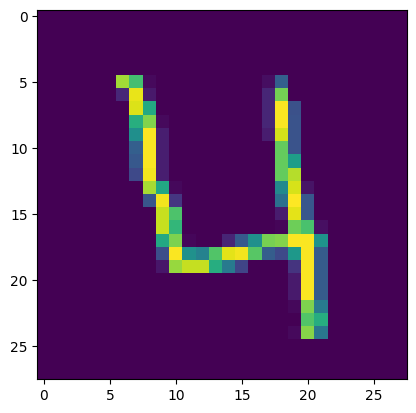

In [9]:
import matplotlib.pyplot as plt

num = np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(num)
plt.show()

In [11]:
arr= train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

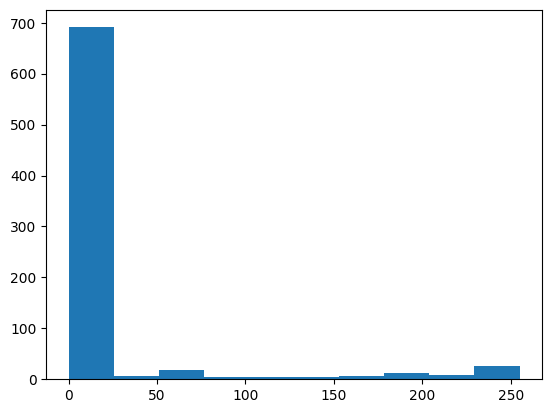

In [12]:
plt.hist(arr)

In [13]:
max(arr)

255

In [14]:
missing_val_count = train.isnull().sum()
missing_val_count


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [16]:
x= np.array(train)
y = np.array(test)

x_train=x[:,1:]
y_train =x[:,0]

x_test =y

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_train = x_train.reshape(-1, 28, 28, 1)


In [26]:
datagen= ImageDataGenerator(
    rotation_range=15,
    height_shift_range =0.1,
    zoom_range = 0.1,
    shear_range = 0.1
)

datagen.fit(x_train)

In [27]:
x_train=x_train.reshape(-1,784)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
int(knn.predict(x_test[102].reshape(1,-1)))

/tmp/ipykernel_34/1810168131.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(x_test[102].reshape(1,-1)))


2

/tmp/ipykernel_34/1985812929.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(knn.predict(x_test[test_sample_index].reshape(1, -1)))


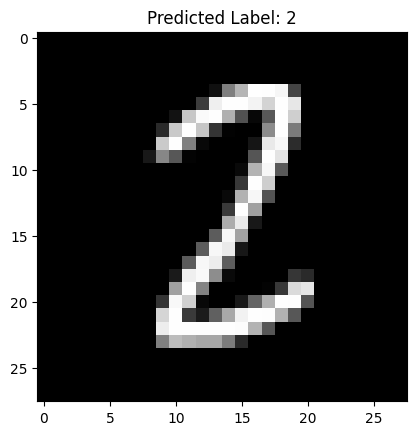

In [45]:
test_sample_index = 102
predicted_label = int(knn.predict(x_test[test_sample_index].reshape(1, -1)))


test_sample_image = x_test[102].reshape(28, 28)
plt.imshow(test_sample_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()